# **Data Loading**

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
# load the dataset
url = '/content/drive/MyDrive/Data-full-Consumtion-Energi.csv'
consumption = pd.read_csv(url)
consumption

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2.513943e+14,4.343158e+15,1.565694e+16,5,On,Off,2.774699e+15,Monday,No,7.536437e+15
1,2.773165e+16,5.422592e+16,1.411065e+15,1,On,On,2.183138e+16,Saturday,No,8.340185e+15
2,2.870428e+16,5.890766e+16,1.755715e+14,2,Off,Off,6.764672e+14,Sunday,No,7.827089e+15
3,2.008047e+16,5.037164e+14,1.452316e+15,1,Off,On,8.623447e+15,Wednesday,No,5.651985e+15
4,2.309736e+15,5.140142e+15,1.094130e+16,9,On,Off,3.071969e+16,Friday,No,7.081173e+15
...,...,...,...,...,...,...,...,...,...,...
995,2.861938e+16,4.885016e+15,1.080087e+16,5,Off,Off,2.119470e+16,Saturday,No,8.230669e+15
996,2.383665e+16,4.725644e+15,1.705235e+16,4,Off,On,2.574818e+16,Tuesday,Yes,6.657732e+15
997,2.300534e+16,4.872050e+15,1.320285e+16,6,Off,On,2.970786e+15,Friday,Yes,7.275347e+15
998,2.513836e+16,3.130646e+16,1.309080e+16,3,On,Off,2.042516e+16,Thursday,Yes,7.695039e+15


In [141]:
consumption.shape

(1000, 10)

Output kode di atas memberikan informasi sebagai berikut:

Ada 1000 baris records dalam dataset.
Terdapat 10 kolom yaitu: Temperature,	Humidity,	SquareFootage,	Occupancy,	HVACUsage,	LightingUsage,	RenewableEnergy,	DayOfWeek,	Holiday, dan	EnergyConsumption

# **Exploratory Data Analysis**

## **Deskripsi Variabel**

* Temperature	      : Suhu
* Humidity	        : Kelembaban
* SquareFootage	    : Rekaman Persegi
* Occupancy	        : Hunian
* HVACUsage	        : Penggunaan HVACU
* LightingUsage	    : Penggunaan pencahayaan
* RenewableEnergy	  : Energi terbarukan
* DayOfWeek	        : Hari dalam seminggu
* Holiday	          : Hari libur
* EnergyConsumption : Konsumsi energi

In [142]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        1000 non-null   float64
 1   Humidity           1000 non-null   float64
 2   SquareFootage      1000 non-null   float64
 3   Occupancy          1000 non-null   int64  
 4   HVACUsage          1000 non-null   object 
 5   LightingUsage      1000 non-null   object 
 6   RenewableEnergy    1000 non-null   float64
 7   DayOfWeek          1000 non-null   object 
 8   Holiday            1000 non-null   object 
 9   EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 78.2+ KB


Dari output terlihat bahwa:

Terdapat 4 kolom dengan tipe object, yaitu: HVACUsage, LightingUsage, DayOfWeek, Holiday. Kolom ini merupakan categorical features (fitur non-numerik).
Terdapat 5 kolom numerik dengan tipe data float64 yaitu: Temperature, Humidity, SquareFootage, RenewableEnergy dan EnergyConsumption.
Terdapat 1 kolom numerik dengan tipe data int64, yaitu: Occupancy.

In [143]:
consumption.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03
mean,1.713856e+16,1.713457e+16,1.162132e+16,4.581000,1.349850e+16,7.304620e+15
std,1.108579e+16,1.959164e+16,6.348143e+15,2.865598,1.146156e+16,5.450979e+15
min,2.425022e+13,3.740113e+13,1.013538e+12,0.000000,7.475807e+12,5.882047e+12
25%,2.648012e+15,4.062649e+15,1.004718e+16,2.000000,2.939486e+15,6.849132e+15
50%,2.254394e+16,5.138905e+15,1.330325e+16,5.000000,1.141080e+16,7.587113e+15
75%,2.591217e+16,3.494255e+16,1.667137e+16,7.000000,2.102668e+16,8.208388e+15
max,2.999867e+16,5.995451e+16,1.999751e+16,9.000000,7.745270e+16,6.397862e+16


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

Count adalah jumlah sampel pada data.
Mean adalah nilai rata-rata.
Std adalah standar deviasi.
Min yaitu nilai minimum setiap kolom.
25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
75% adalah kuartil ketiga.
Max adalah nilai maksimum.

# **Data Assesing**

## **Data Duplikat**

In [144]:
consumption.duplicated().sum()

0

## **Missing Value**

In [145]:
consumption.isna().sum()

Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

# **Data Cleaning**

## **Menangani Outliers**

Beberapa pengamatan dalam satu set data kadang berada di luar lingkungan pengamatan lainnya. Pengamatan seperti itu disebut outlier.

Ada beberapa teknik untuk menangani outliers, antara lain:

* Hypothesis Testing
* Z-score method
* IQR Method

Pada kasus ini, Anda akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, Anda akan menangani outliers dengan teknik IQR method

IQR = Inter Quartile Range

IQR = Q3 - Q1.

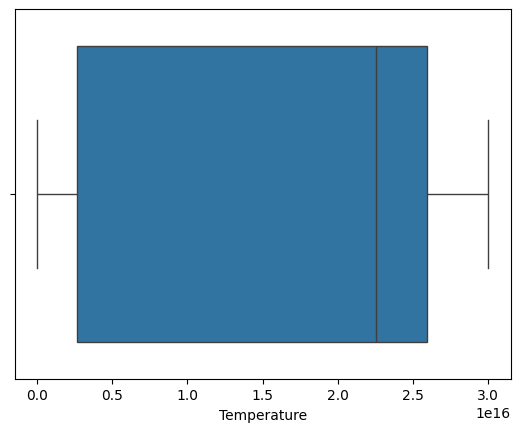

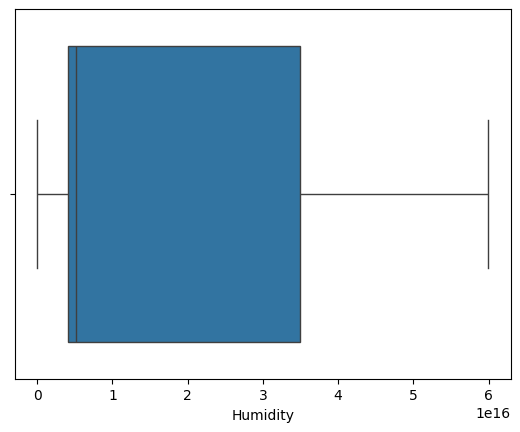

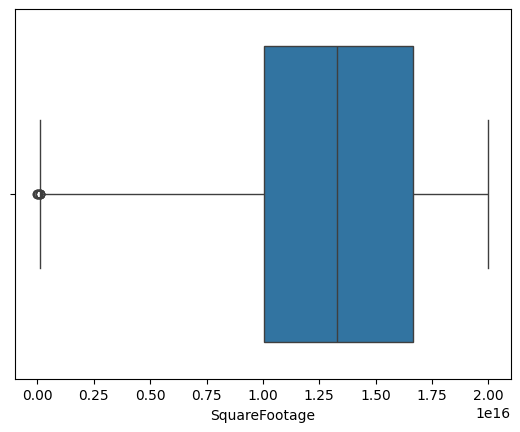

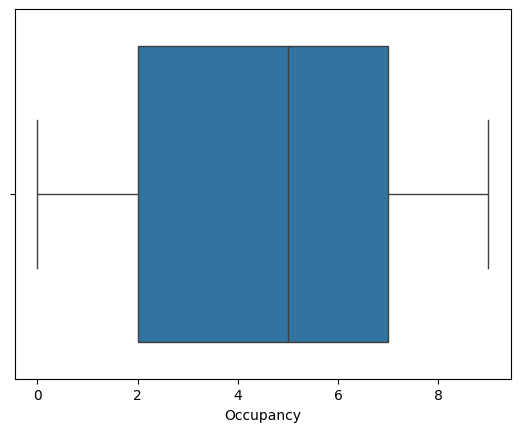

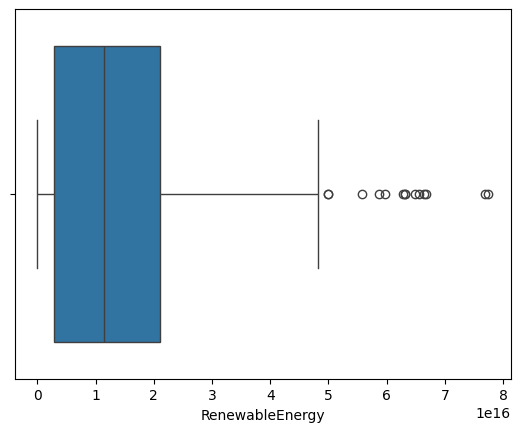

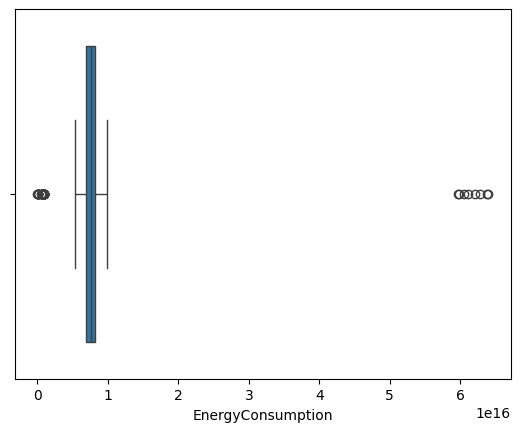

In [146]:
#Seltman dalam “Experimental Design and Analysis” [24] menyatakan bahwa outliers yang diidentifikasi oleh boxplot (disebut juga “boxplot outliers”) didefinisikan sebagai data yang nilainya 1.5 QR di atas Q3 atau 1.5 QR di bawah Q1.
#Hal pertama yang perlu Anda lakukan adalah membuat batas bawah dan batas atas. Untuk membuat batas bawah, kurangi Q1 dengan 1,5 * IQR. Kemudian, untuk membuat batas atas, tambahkan 1.5 * IQR dengan Q3.

consumption1=consumption.select_dtypes(exclude=['object'])
for column in consumption1:
        plt.figure()
        sns.boxplot(data=consumption1, x=column)

In [147]:
Q1 = consumption.quantile(0.25)
Q3 = consumption.quantile(0.75)
IQR=Q3-Q1

housing = consumption[~((consumption<(Q1-1.5*IQR))|(consumption>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-147-ecc7fd60bf15>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = consumption.quantile(0.25)
<ipython-input-147-ecc7fd60bf15>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = consumption.quantile(0.75)
<ipython-input-147-ecc7fd60bf15>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  housing = consumption[~((consumption<(Q1-1.5*IQR))|(consumption>(Q3+1.5*IQR))).any(axis=1)]


Cek ukuran dataset setelah drop outliers dengan housing.shape

In [148]:
consumption.shape

(1000, 10)

Dataset Anda sekarang telah bersih dan memiliki 100 sampel

# **Data Analysis**

Selanjutnya, lakukan proses analisis data dengan teknik Univariate EDA. Pertama, Anda bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [149]:
categorical_features = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
numerical_features = ['Timestamp', 'Temperatur',	'Humidity',	'SquareFootage',	'Occupancy',	'RenewableEnergy',	'EnergyConsumption']


## **Univariate Analysis**

Univariate visualization merupakan bentuk visualisasi data yang hanya merepresentasikan informasi yang terdapat pada satu variabel. Jenis visualisasi ini umumnya digunakan untuk memberikan gambaran terkait distribusi sebuah variabel dalam suatu dataset.

a. Data Kategori


     Jumlah sampel  Persentase
Off            508        50.8
On             492        49.2


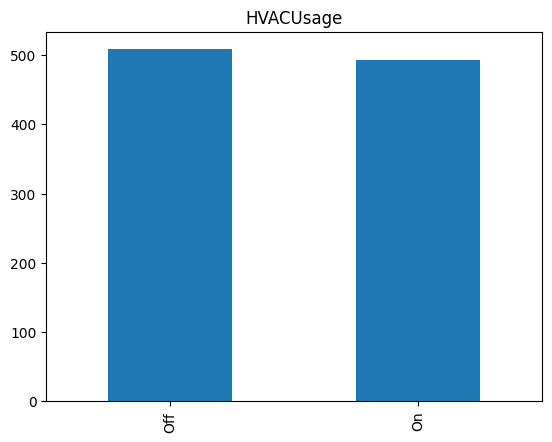

In [150]:
feature = categorical_features[0]
count = consumption[feature].value_counts()
percent = 100*consumption[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

     Jumlah sampel  Persentase
Off            509        50.9
On             491        49.1


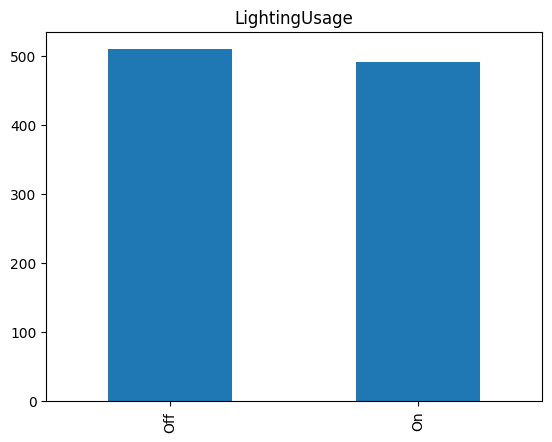

In [151]:
feature = categorical_features[1]
count = consumption[feature].value_counts()
percent = 100*consumption[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

           Jumlah sampel  Persentase
Friday               164        16.4
Sunday               154        15.4
Thursday             146        14.6
Tuesday              146        14.6
Saturday             143        14.3
Wednesday            124        12.4
Monday               123        12.3


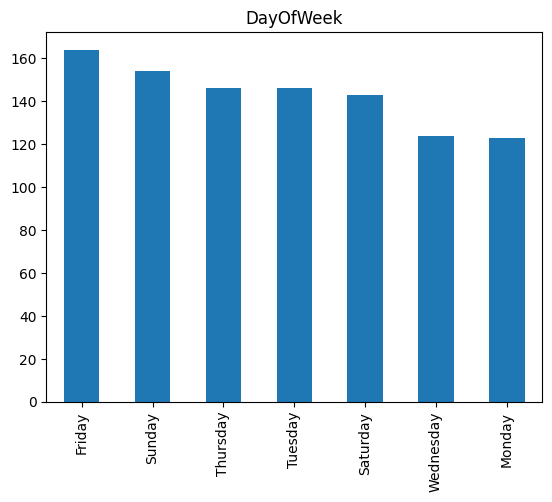

In [152]:
feature = categorical_features[2]
count = consumption[feature].value_counts()
percent = 100*consumption[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

     Jumlah sampel  Persentase
No             533        53.3
Yes            467        46.7


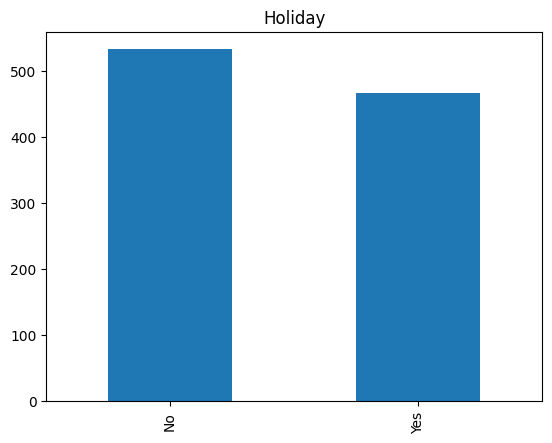

In [153]:
feature = categorical_features[3]
count = consumption[feature].value_counts()
percent = 100*consumption[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

b. Data Numerik

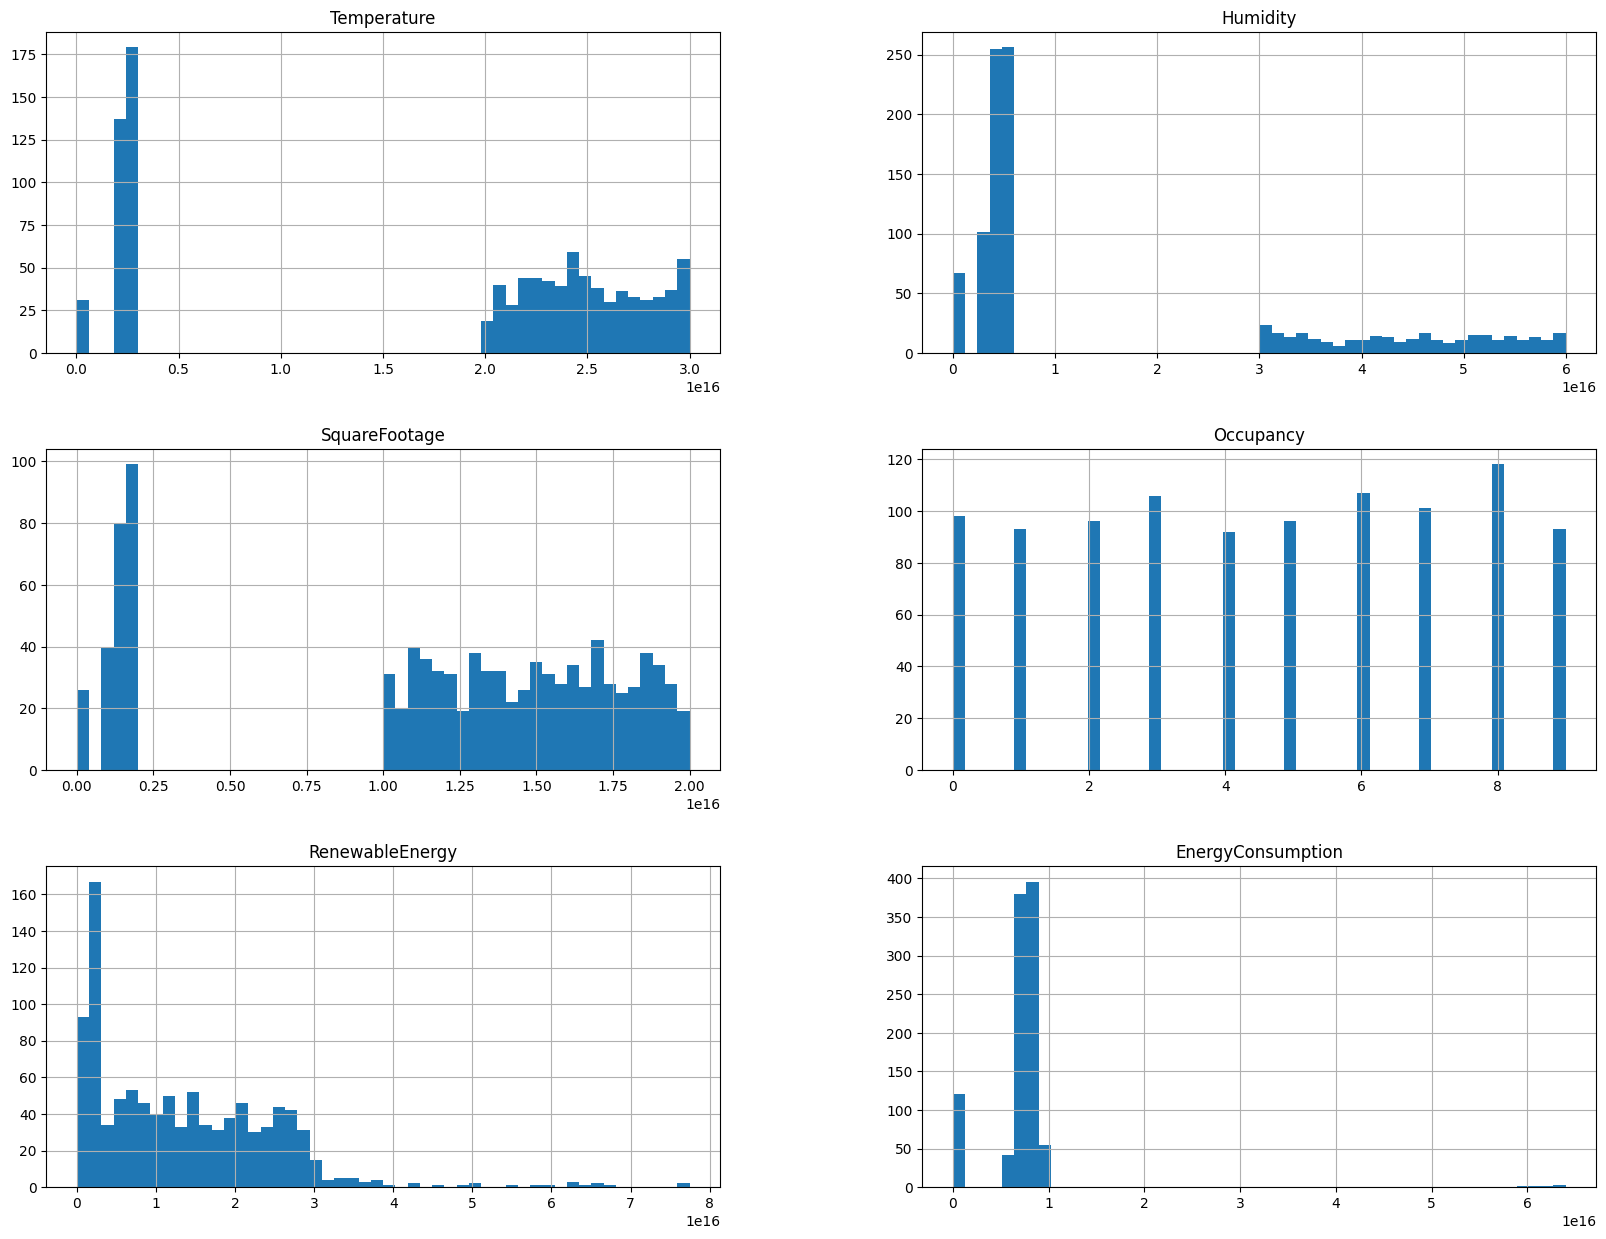

In [154]:
consumption.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram "ConsumptionEnergy", diperoleh beberapa informasi, antara lain:

* Peningkatan Konsumsi Energi sebanding dengan penurunan jumlah sampel. Hal ini dapat terlihat jelas dari histogram "ConsumptionEnergy" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).

* Distribusi konsumsi energi miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

## **Multivariate Analysis**

Multivariate visualization merupakan jenis visualisasi data untuk menggambarkan informasi yang terdapat dalam lebih dari dua variabel. Jenis visualisasi ini digunakan untuk merepresentasikan hubungan dan pola yang terdapat dalam multidimensional data.

Pada tahap ini,cek rata-rata "ConsumptionEnergy" terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap "ConsumptionEnergy".

a. Data Kategori

<ipython-input-155-4144c0ff351a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='EnergyConsumption', kind="bar", dodge=False, height = 4, aspect = 3,  data=consumption, palette="Set3")
<ipython-input-155-4144c0ff351a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='EnergyConsumption', kind="bar", dodge=False, height = 4, aspect = 3,  data=consumption, palette="Set3")
<ipython-input-155-4144c0ff351a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='EnergyConsumption', kind="bar", dodge=False, height = 4, aspect

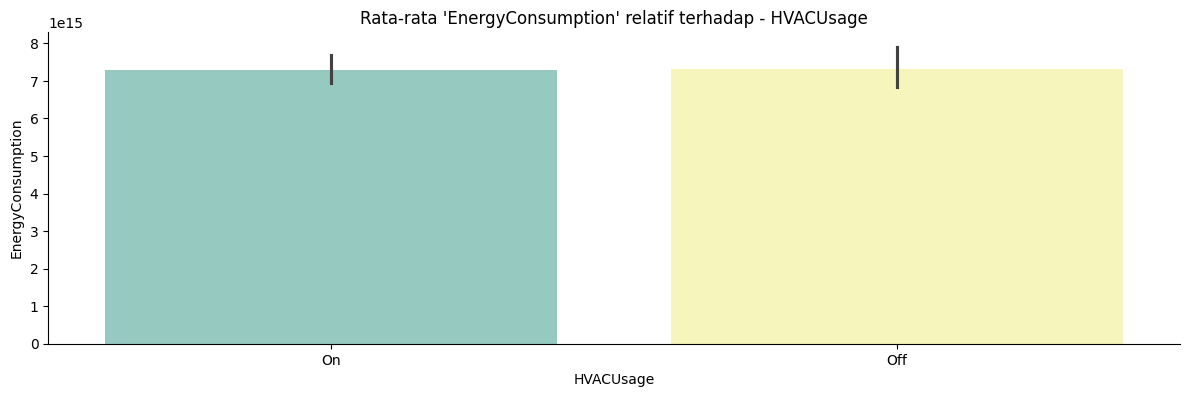

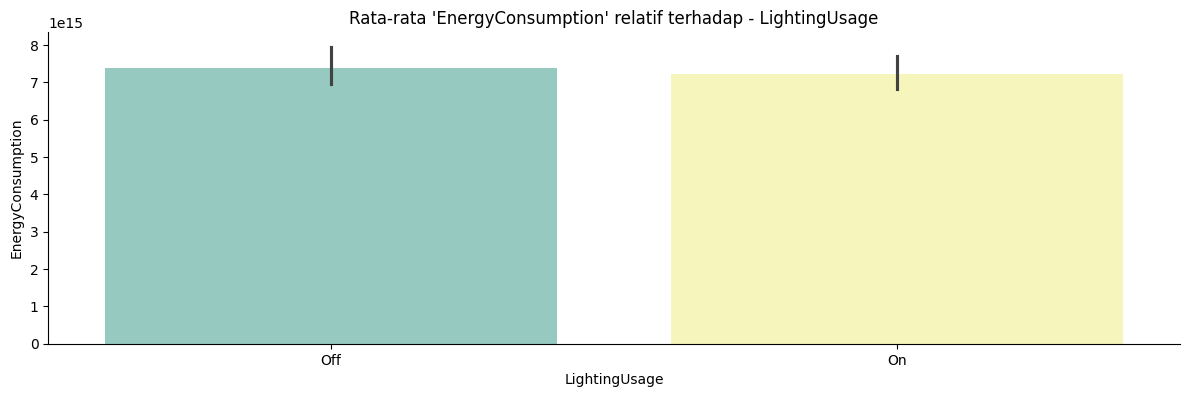

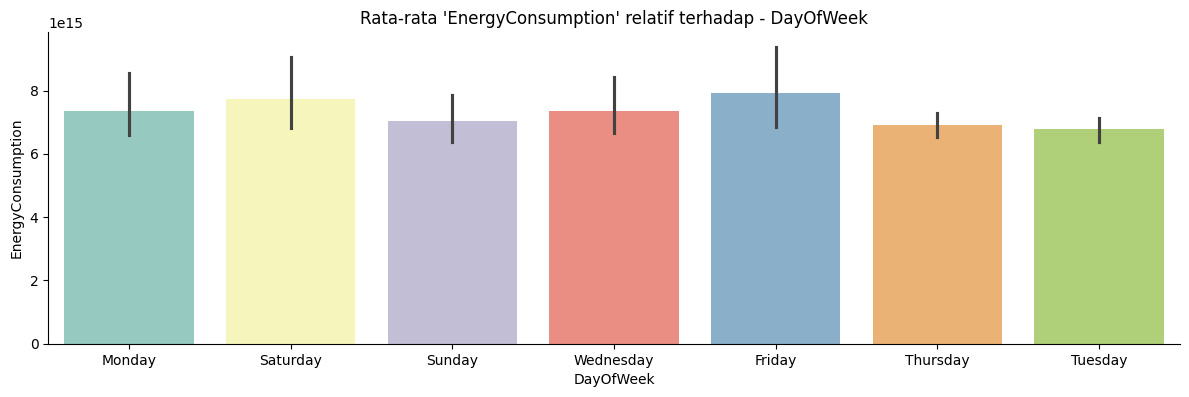

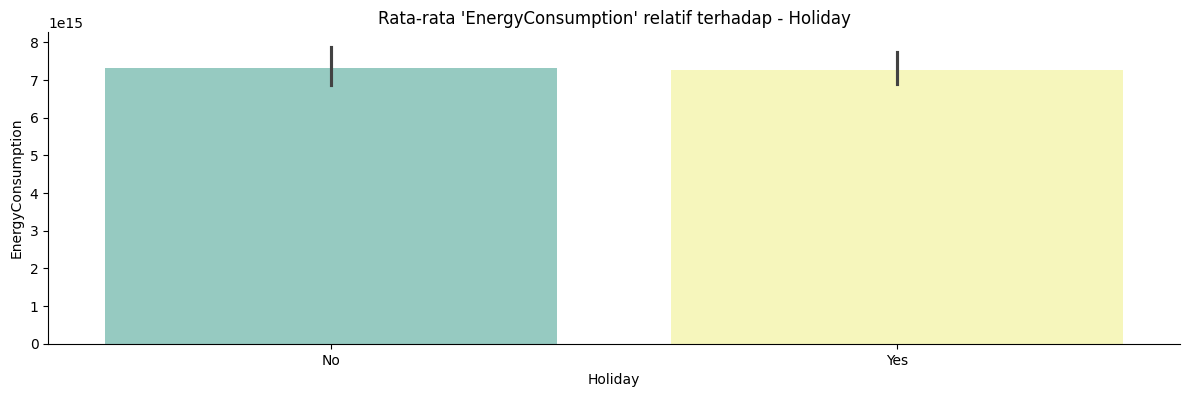

In [155]:
cat_features = consumption.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='EnergyConsumption', kind="bar", dodge=False, height = 4, aspect = 3,  data=consumption, palette="Set3")
  plt.title("Rata-rata 'EnergyConsumption' relatif terhadap - {}".format(col))


Dengan mengamati rata-rata 'EnergyConsumption' relatif terhadap fitur kategori di atas, diperoleh insight sebagai berikut:

1. Pada fitur 'HVACUsage'
* Rata-rata 'EnergyConsumption' hanya terdapat 2 bervariasi. Rentangnya berada antara lebih dari 7 hingga kurang dari 8.
* Nilai 'EnergyConsumption'  pada nilai 'HVACUsage' cukup setara karena hanya ada dua pilihan yaitu On dan Off dan nilai nya tidak terlihat perbedaannya secara signifikan. Namun, fitur 'HVACUsage' memiliki pengaruh yang signifikan terhadap rata-rata 'EnergyConsumption'.
2. Pada Fitur 'LightingUsage'
* Rata-rata 'EnergyConsumption' hanya terdapat 2 bervariasi. Rentangnya berada antara lebih dari 7 hingga kurang dari 8.
* Nilai 'EnergyConsumption'  pada nilai 'LightingUsage' cukup setara karena hanya ada dua pilihan yaitu On dan Off dan nilai nya tidak terlihat perbedaannya secara signifikan. Namun, fitur 'LightingUsage' memiliki pengaruh yang signifikan terhadap rata-rata 'EnergyConsumption'.
3. Pada Fitur 'DayOfWeek'
* Rata-rata 'EnergyConsumption' cukup bervariasi senanyak Jumlah Hari. Rentangnya juga berada antara lebih dari 7 hingga kurang dari 8.
* Nilai 'EnergyConsumption' tertinggi berada pada nilai 'DayOfWeek' yaitu 'Friday' dan nilai 'EnergyConsumption' terendah berada pada nilai 'DayOfWeek' yaitu 'Tuesday'. Sehingga, fitur 'DayOfWeek' juga memiliki pengaruh yang signifikan terhadap rata-rata 'EnergyConsumption'.
4. Pada Fitur 'Holiday'
* Rata-rata 'EnergyConsumption' hanya terdapat 2 bervariasi. Rentangnya berada antara lebih dari 7 hingga kurang dari 8.
* Nilai 'EnergyConsumption'  pada nilai 'LightingUsage' cukup setara karena hanya ada dua pilihan yaitu Yes dan No dan nilai nya tidak terlihat perbedaannya secara signifikan. Namun, fitur 'LightingUsage' juga memiliki pengaruh yang signifikan terhadap rata-rata 'EnergyConsumption'.

**Kesimpulan akhir, fitur kategori memiliki pengaruh terhadap 'EnergyConsumption'.**

b. Data Numerik

Mengamati hubungan antar fitur numerik dengan fungsi pairplot()

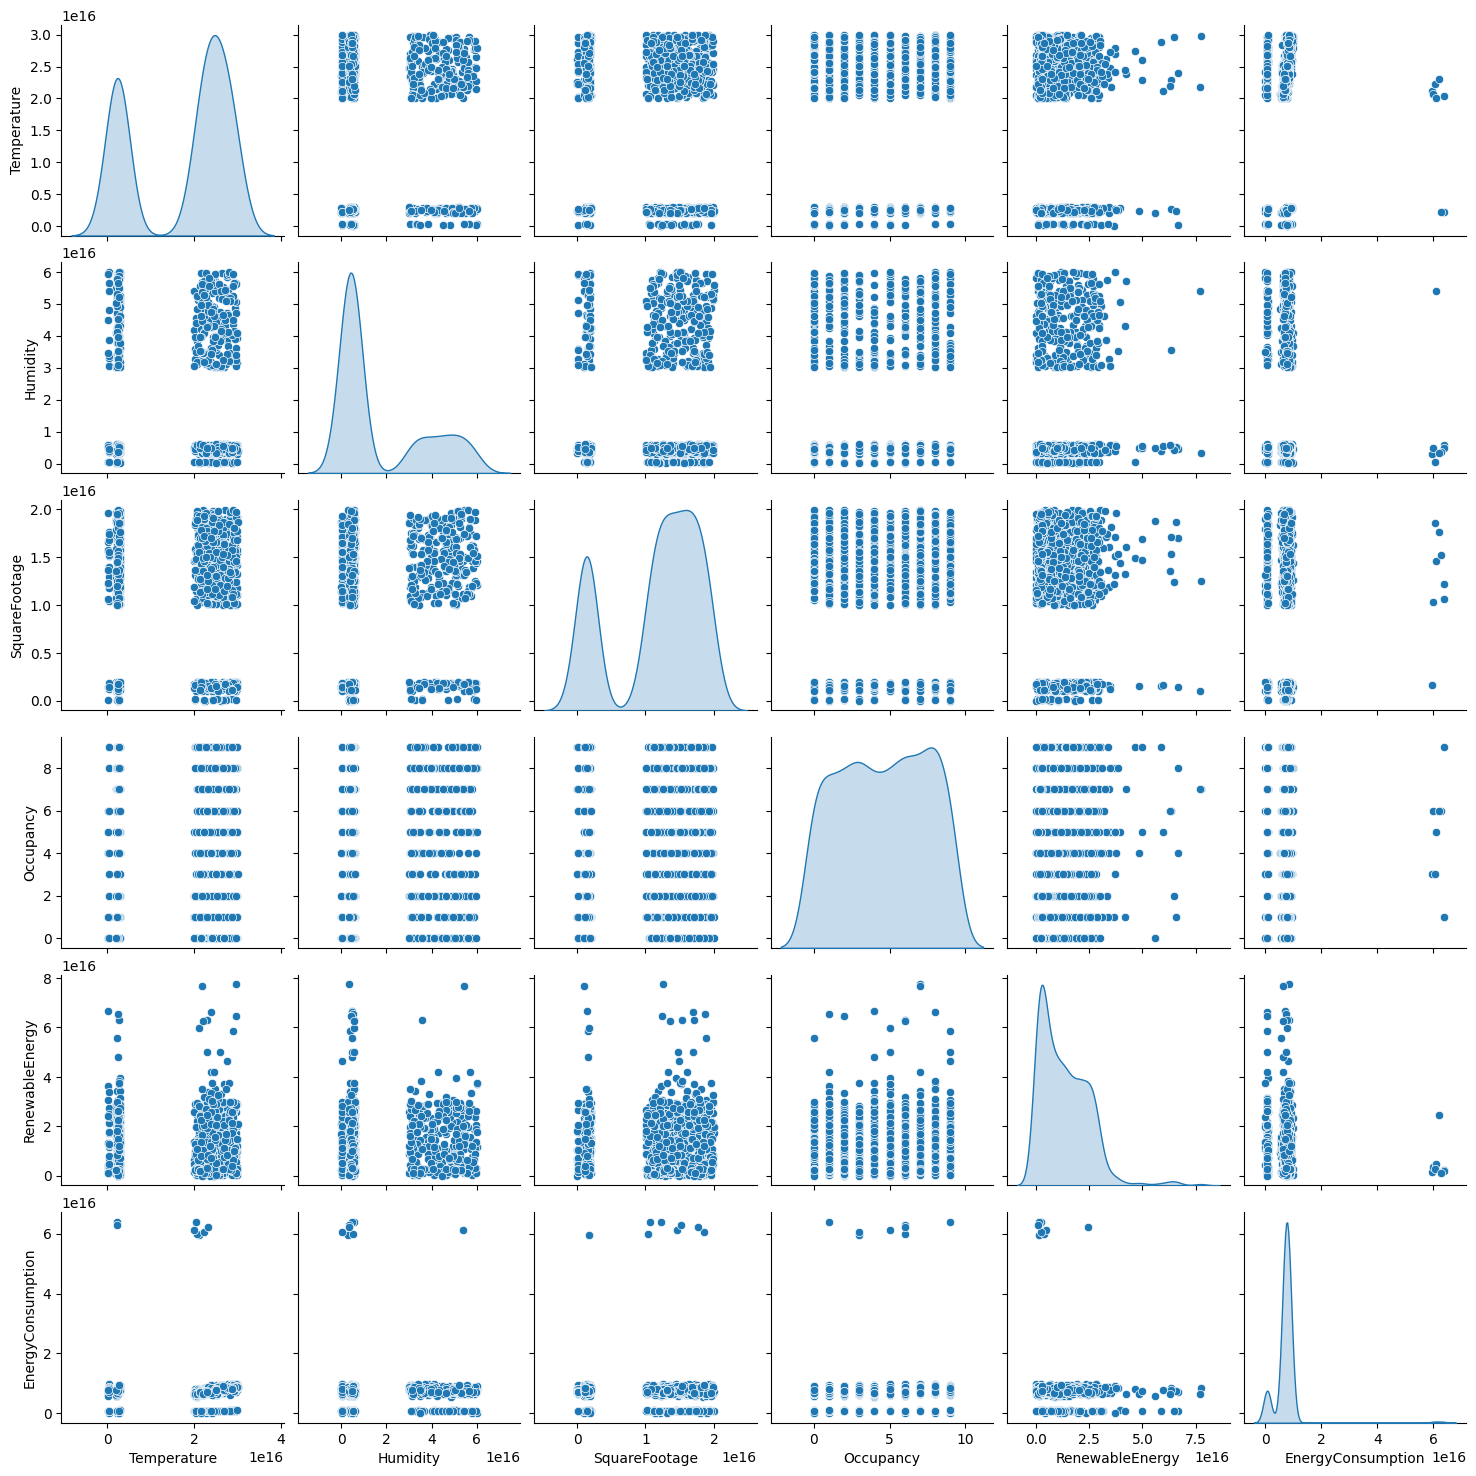

In [156]:
sns.pairplot(consumption, diag_kind = 'kde')

Fungsi pairplot dari library seaborn menunjukkan relasi pasangan dalam dataset. Dari grafik, terlihat plot relasi masing-masing fitur numerik pada dataset. Pada pola sebaran data grafik pairplot sebelumnya, terlihat bahwa 'Temperature', 'Humidity', dan 'SquareFootage' memiliki korelasi dengan fitur 'EnergyConsumption'. Sedangkan kedua fitur lainnya terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola



Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah

Untuk mengevaluasi skor korelasinya, gunakan fungsi corr().

<ipython-input-157-ab51afef0a77>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = consumption.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

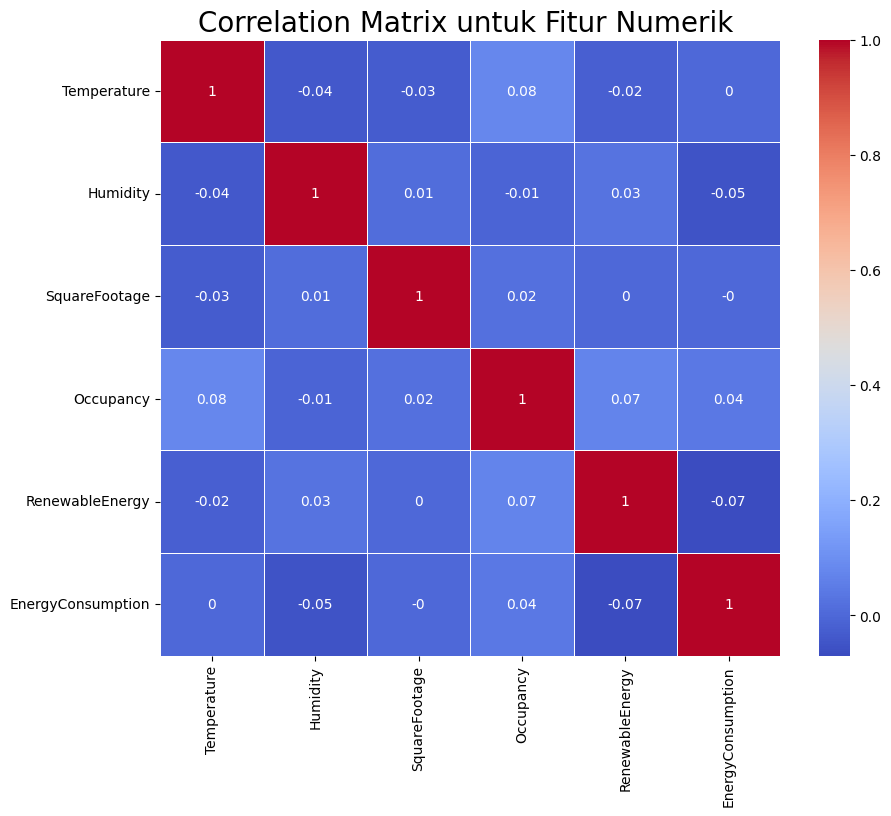

In [157]:
plt.figure(figsize=(10, 8))
correlation_matrix = consumption.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Jika diamati, fitur 'Occupancy' memiliki skor korelasi yang cukup besar (0.04) dengan fitur target 'EnergyConsumption'. Artinya, fitur 'EnergyConsumption' berkorelasi cukup tinggi dengan kedua fitur tersebut. Sementara itu, fitur lainnya memiliki korelasi negatif sehingga, fitur tersebut dapat di-drop.

In [158]:
consumption.drop(['Temperature', 'Humidity','Occupancy'], inplace=True, axis=1)
consumption.head()

,SquareFootage,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,1.565694e+16,On,Off,2.774699e+15,Monday,No,7.536437e+15
1,1.411065e+15,On,On,2.183138e+16,Saturday,No,8.340185e+15
2,1.755715e+14,Off,Off,6.764672e+14,Sunday,No,7.827089e+15
3,1.452316e+15,Off,On,8.623447e+15,Wednesday,No,5.651985e+15
4,1.094130e+16,On,Off,3.071969e+16,Friday,No,7.081173e+15


# **Data Preparation**

Data Peparation merupakan tahapan penting dalam proses pengembangan model machine learning. Pada tahap ini lakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain, seleksi fitur, transformasi data, feature engineering, dan dimensionality reduction.

Pada bagian ini lakukan empat tahap persiapan data, yaitu:

* Encoding fitur kategori.
* Reduksi dimensi dengan Principal Component Analysis (PCA).
* Pembagian dataset dengan fungsi train_test_split dari library sklearn.
* Standarisasi.

## **Encoding**

Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding. Lakukan proses encoding ini dengan fitur get_dummies.

In [159]:
from sklearn.preprocessing import  OneHotEncoder
consumption = pd.concat([consumption, pd.get_dummies(consumption['LightingUsage'], prefix='LightingUsage')],axis=1)
consumption.drop(['LightingUsage'], axis=1, inplace=True)
consumption.head()

,SquareFootage,HVACUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,LightingUsage_Off,LightingUsage_On
0,1.565694e+16,On,2.774699e+15,Monday,No,7.536437e+15,1,0
1,1.411065e+15,On,2.183138e+16,Saturday,No,8.340185e+15,0,1
2,1.755715e+14,Off,6.764672e+14,Sunday,No,7.827089e+15,1,0
3,1.452316e+15,Off,8.623447e+15,Wednesday,No,5.651985e+15,0,1
4,1.094130e+16,On,3.071969e+16,Friday,No,7.081173e+15,1,0


In [160]:
from sklearn.preprocessing import  OneHotEncoder
consumption = pd.concat([consumption, pd.get_dummies(consumption['DayOfWeek'], prefix='DayOfWeek')],axis=1)
consumption.drop(['DayOfWeek'], axis=1, inplace=True)
consumption.head()

,SquareFootage,HVACUsage,RenewableEnergy,Holiday,EnergyConsumption,LightingUsage_Off,LightingUsage_On,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,1.565694e+16,On,2.774699e+15,No,7.536437e+15,1,0,0,1,0,0,0,0,0
1,1.411065e+15,On,2.183138e+16,No,8.340185e+15,0,1,0,0,1,0,0,0,0
2,1.755715e+14,Off,6.764672e+14,No,7.827089e+15,1,0,0,0,0,1,0,0,0
3,1.452316e+15,Off,8.623447e+15,No,5.651985e+15,0,1,0,0,0,0,0,0,1
4,1.094130e+16,On,3.071969e+16,No,7.081173e+15,1,0,1,0,0,0,0,0,0


In [161]:
from sklearn.preprocessing import  OneHotEncoder
consumption = pd.concat([consumption, pd.get_dummies(consumption['Holiday'], prefix='Holiday')],axis=1)
consumption.drop(['Holiday'], axis=1, inplace=True)
consumption.head()

,SquareFootage,HVACUsage,RenewableEnergy,EnergyConsumption,LightingUsage_Off,LightingUsage_On,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Holiday_No,Holiday_Yes
0,1.565694e+16,On,2.774699e+15,7.536437e+15,1,0,0,1,0,0,0,0,0,1,0
1,1.411065e+15,On,2.183138e+16,8.340185e+15,0,1,0,0,1,0,0,0,0,1,0
2,1.755715e+14,Off,6.764672e+14,7.827089e+15,1,0,0,0,0,1,0,0,0,1,0
3,1.452316e+15,Off,8.623447e+15,5.651985e+15,0,1,0,0,0,0,0,0,1,1,0
4,1.094130e+16,On,3.071969e+16,7.081173e+15,1,0,1,0,0,0,0,0,0,1,0


In [162]:
from sklearn.preprocessing import  OneHotEncoder
consumption = pd.concat([consumption, pd.get_dummies(consumption['HVACUsage'], prefix='HVACUsage')],axis=1)
consumption.drop(['HVACUsage'], axis=1, inplace=True)
consumption.head()

,SquareFootage,RenewableEnergy,EnergyConsumption,LightingUsage_Off,LightingUsage_On,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Holiday_No,Holiday_Yes,HVACUsage_Off,HVACUsage_On
0,1.565694e+16,2.774699e+15,7.536437e+15,1,0,0,1,0,0,0,0,0,1,0,0,1
1,1.411065e+15,2.183138e+16,8.340185e+15,0,1,0,0,1,0,0,0,0,1,0,0,1
2,1.755715e+14,6.764672e+14,7.827089e+15,1,0,0,0,0,1,0,0,0,1,0,1,0
3,1.452316e+15,8.623447e+15,5.651985e+15,0,1,0,0,0,0,0,0,1,1,0,1,0
4,1.094130e+16,3.071969e+16,7.081173e+15,1,0,1,0,0,0,0,0,0,1,0,0,1


## **Reduksi Dimensi dengan PCA**

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Ia adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

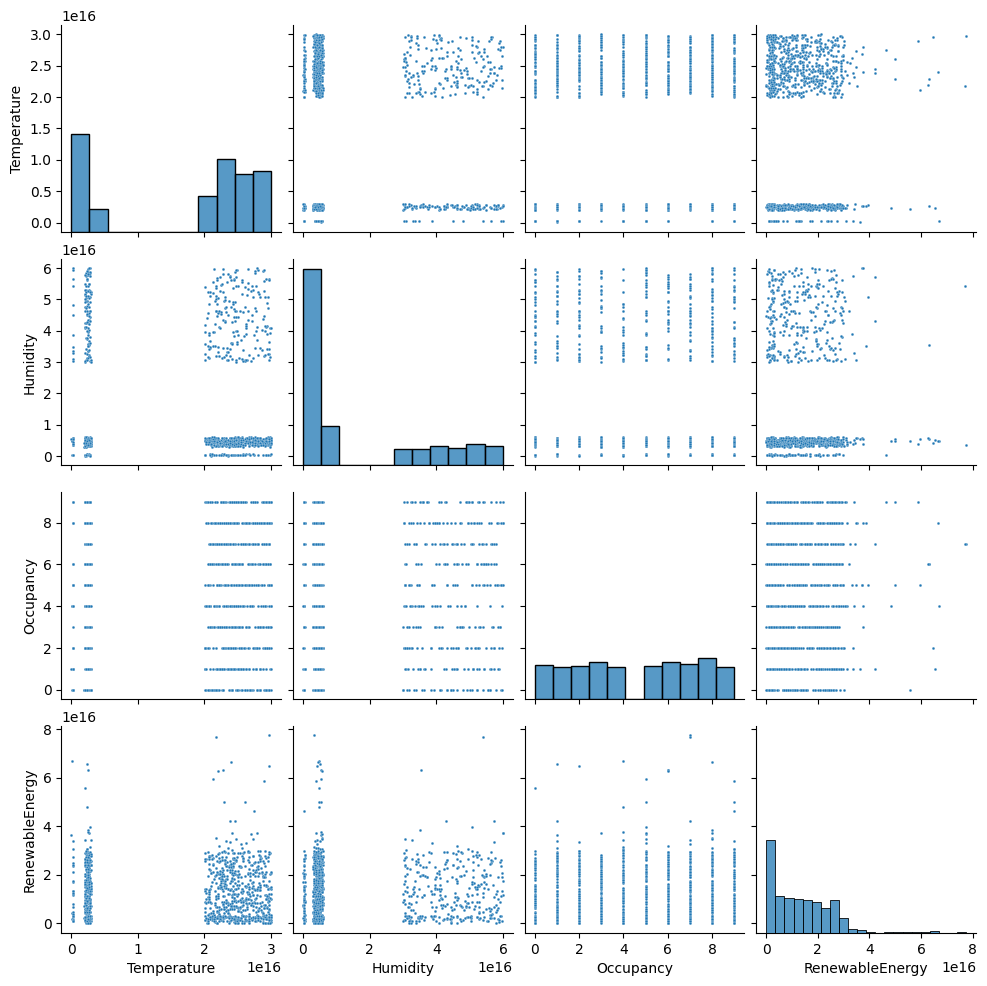

In [165]:
sns.pairplot(consumption[['Temperature', 'Humidity', 'Occupancy', 'RenewableEnergy']], plot_kws={"s": 4});

Berdasarkan hasil visualisasi dapat diketahui yang memiliki hubungan antar fitur hanya tiga yaitu 'Temperature', 'Humidity', 'RenewableEnergy'.

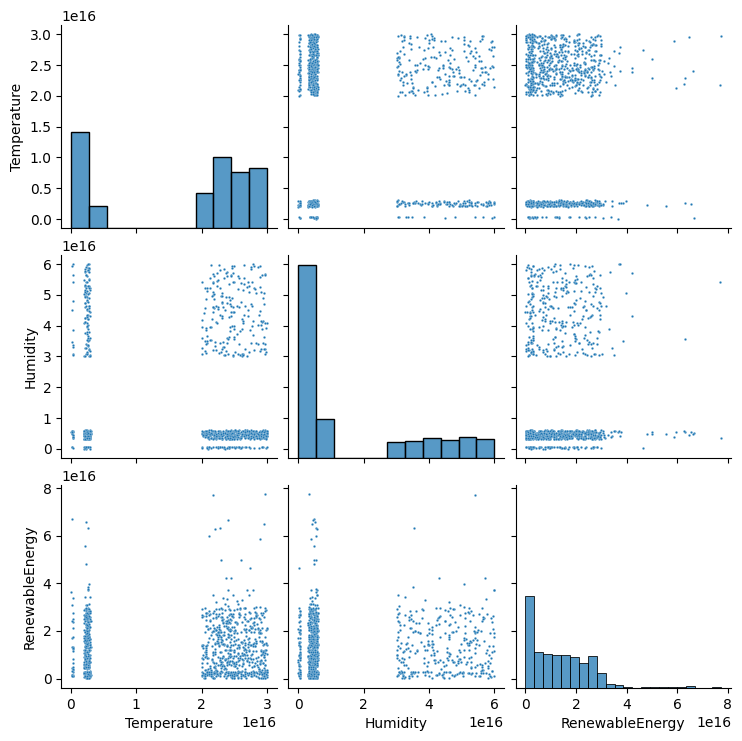

In [166]:
sns.pairplot(consumption[['Temperature', 'Humidity', 'RenewableEnergy']], plot_kws={"s": 3});

Selanjutnya, reduksi 3 fitur ini dengan PCA

In [167]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(consumption[['Temperature', 'Humidity', 'RenewableEnergy']])
princ_comp = pca.transform(consumption[['Temperature', 'Humidity', 'RenewableEnergy']])

Setelah menerapkan class PCA, cek proporsi informasi dari ketiga komponen PCs tadi.

In [168]:
pca.explained_variance_ratio_.round(3)

array([0.602, 0.206, 0.192])

Dari output di atas 60.2% informasi pada ketiga fitur 'Temperature', 'Humidity', 'RenewableEnergy' terdapat pada PC pertama. Sedangkan sisanya, sebesar 20.6% dan 19.2% terdapat pada PC kedua dan ketiga.

Berdasarkan hasil ini, reduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur 'energy properties' menggantikan ketiga fitur lainnya ('Temperature', 'Humidity', 'RenewableEnergy'). Beri nama fitur ini 'energy properties'

In [169]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(consumption[['Temperature', 'Humidity', 'RenewableEnergy']])
consumption['energy properties'] = pca.transform(consumption.loc[:, ('Temperature', 'Humidity', 'RenewableEnergy')]).flatten()
consumption.drop(['Temperature', 'Humidity', 'RenewableEnergy'], axis=1, inplace=True)
consumption.head()

,SquareFootage,Occupancy,HVACUsage,LightingUsage,DayOfWeek,Holiday,EnergyConsumption,energy properties
0,1.565694e+16,5,On,Off,Monday,No,7.536437e+15,-1.248417e+16
1,1.411065e+15,1,On,On,Saturday,No,8.340185e+15,3.691340e+16
2,1.755715e+14,2,Off,Off,Sunday,No,7.827089e+15,4.103325e+16
3,1.452316e+15,1,Off,On,Wednesday,No,5.651985e+15,-1.683558e+16
4,1.094130e+16,9,On,Off,Friday,No,7.081173e+15,-1.106235e+16


## **Train-Test-Split**

Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus diakukan sebelum membuat model. Hal ini diperlukan untuk menguji seberapa baik generalisasi model terhadap data baru.

Pada model ini, proporsi pembagian sebesar 90:10 dengan fungsi train_test_split dari sklearn.

In [170]:
from sklearn.model_selection import train_test_split

X = consumption.drop(["EnergyConsumption", "HVACUsage", "LightingUsage", "DayOfWeek", "Holiday"],axis =1)
y = consumption["EnergyConsumption"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [171]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 900
Total # of sample in test dataset: 100


## **Standarisasi**

Algoritma machine learning memiliki performa lebih baik dan lebih cepat ketika dimodelkan pada data dengan yang mendekati distribusi normal. Scaling dan standarisasi merupakan metode yang dapat dilakukan

Untuk fitur numerik, tidak dilakukan proses transformasi dengan one-hot-encoding seperti pada fitur kategori. Yang digunakan untuk standarisasi adalah StandarScaler.

StandardScaler merupakan proses standarisasi fitur dengan mengurangkan mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0.

In [172]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['SquareFootage',	'Occupancy', 'energy properties']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,SquareFootage,Occupancy,energy properties
875,0.776218,0.130714,-0.674446
933,0.266394,1.518827,-0.720812
861,0.288537,1.518827,-0.660096
868,-0.083119,0.824770,1.824482
792,0.936430,0.824770,-0.651252


Seperti yang telah disebutkan sebelumnya, proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1. Untuk itu perlu dicek nilai mean dan standar deviasi pada setelah proses standarisasi.

In [173]:
X_train[numerical_features].describe().round(4)

,SquareFootage,Occupancy,energy properties
count,900.0000,900.0000,900.0000
mean,-0.0000,0.0000,0.0000
std,1.0006,1.0006,1.0006
min,-1.8497,-1.6044,-0.8943
25%,-0.2565,-0.9104,-0.6746
50%,0.2741,0.1307,-0.6160
75%,0.7862,0.8248,0.9143
max,1.3107,1.5188,2.1937


Berdasarkan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1.

# **Model Development**

Model development adalah tahapan dimana digunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding Pada tahap ini, dibuat model machine learning dengan tiga algoritma. Kemudian, evaluasi performa masing-masing algoritma dan pilih algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan digunakan, antara lain:

1. Regresi Linier
2. Regresi Ridge
3. Random Forest
4. Random Forest dengan Tuning GridSearchCV

In [174]:
#Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['LinearRegression', 'RidgeRegression', 'RandomForest', 'RandomForest_GridSearchCV'])


## **1. Regresi Linear**

Regresi linear adalah teknik analisis data yang memprediksi nilai data yang tidak diketahui dengan menggunakan nilai data lain yang terkait dan diketahui.



In [175]:
#Selanjutnya, untuk melatih data dengan KNN, tuliskan code berikut.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

LR = LinearRegression()
LR.fit(X_train, y_train)
print ('Coefficients: ', LR .coef_)
print ('Intercept: ', LR .intercept_)
models.loc['train_mse','Linear Regression'] = mean_squared_error(y_pred = LR.predict(X_train), y_true=y_train)


Coefficients:  [-5.06771709e+13  2.11809536e+14 -3.70625255e+14]
Intercept:  7358854493151196.0


Meskipun regresi linear sederhana, mudah dipahami, dan mudah digunakan, ia memiliki kelemahan karena hasil regresi merupakan hasil ramalan dari analisis regresi merupakan nilai estimasi sehingga kemungkinan untuk tidak sesuai dengan data aktual

## **2. Ridge Regression**

Regresi Ridge merupakan metode estimasi koefisien regresi yang diperoleh melalui penambahan konstanta bias sehingga diperoleh persamaan regresi linier yang baru dan tidak mengandung multikolinieritas

In [176]:
from sklearn.linear_model import Ridge
RR = Ridge()
RR.fit(X_train, y_train)
models.loc['train_mse','Ridge Regression'] = mean_squared_error(y_pred = RR.predict(X_train), y_true=y_train)

## **3. Random Forest**

Algoritma random forest dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Random forest juga merupakan algoritma yang sering digunakan karena cukup sederhana tetapi memiliki stabilitas yang mumpuni.

In [177]:
#Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

#buat model prediksi
RF1 = RandomForestRegressor(random_state=100)
RF1.fit(X_train, y_train)
models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred=RF1.predict(X_train), y_true=y_train)


## **4. Random Forest dengan Tuning GridSearchCV**

Untuk meningkatkan model, dilakukan eksperimen dengan menggunakan GridSearchCV untuk melakukan hyperparameter tuning pada Random Forest

Berikut adalah hyperparameter yang digunakan:

* n_estimator: jumlah trees (pohon) di forest
* max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
* min_samples_split menentukan jumlah minimum sampel yang diperlukan untuk memisahkan simpul internal
* min_samples_leafmenentukan jumlah minimum sampel yang diperlukan untuk berada di simpul daun

In [178]:
params = {'n_estimators' : [50,80,100],
          'max_depth' : [3,5,10],
           'min_samples_split':[2,3,4],
            'min_samples_leaf': [2,3,4]}


In [179]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator= RF1 , param_grid=params, cv=3, scoring='r2')
grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=100),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             scoring='r2')

In [180]:
grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 80}

In [181]:
RF2 = RandomForestRegressor(max_depth =10,min_samples_leaf = 4,min_samples_split = 2,n_estimators = 100,random_state=100)
RF2.fit(X_train, y_train)
models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred=RF2.predict(X_train), y_true=y_train)


# **Evaluasi Model**

Sekarang, setelah model selesai dilatih dengan 4 algoritma, selanjutnya lihat performa model dengan menggunakan metrik evaluasi

In [182]:
def metrics(name,key,arg):
    print('Name of the model: ',name)
    print('R^2 of the model:',r2_score(key,arg))
    print('MSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))
    print('......')


In [183]:
y_LR = LR.predict(X_test)
y_RR = RR.predict(X_test)
y_RF1 = RF1.predict(X_test)
y_RF2 = RF2.predict(X_test)

metrics('Performa Model 1', y_test, y_LR)
metrics('Performa Model 2', y_test, y_RR)
metrics('Performa Model 3', y_test, y_RF1)
metrics('Performa Model 4', y_test, y_RF2)

Name of the model:  Performa Model 1
R^2 of the model: -5.866891890416883e+30
MSE of the model: 6.240873331968297e+30
MAE of the model: 5.60355812900379e+30
......
Name of the model:  Performa Model 2
R^2 of the model: -5.854037463450065e+30
MSE of the model: 6.234032670639091e+30
MAE of the model: 5.597412179979567e+30
......
Name of the model:  Performa Model 3
R^2 of the model: -10.86085432086093
MSE of the model: 8873589032742468.0
MAE of the model: 7729832889370363.0
......
Name of the model:  Performa Model 4
R^2 of the model: -1.9107220495762078
MSE of the model: 4395838143451591.0
MAE of the model: 3368259107818206.0
......


Sekarang, setelah model selesai dilatih, lakukan proses scaling terhadap data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan bisa dilakukan evaluasi.

Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1

In [184]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Selanjutnya, evaluasi ketiga model yang ada dengan metrik MSE yang telah dijelaskan di atas.

In [185]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['LR','RR','RF1', 'RF2'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'LR': LR, 'RR': RR, 'RF1': RF1, 'RF2': RF2}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse


,train,test
LR,32026918126592681056822886400.0,7305962508339121452623069184.0
RR,32026918350768869881839353856.0,7305413217194463714409971712.0
RF1,5705406880775640619212079104.0,19971209617704897591432445952.0
RF2,23044138414301849463071703040.0,9256864698166460103683735552.0


Untuk memudahkan, plot metrik tersebut dengan bar chart. Implementasikan kode di bawah ini:

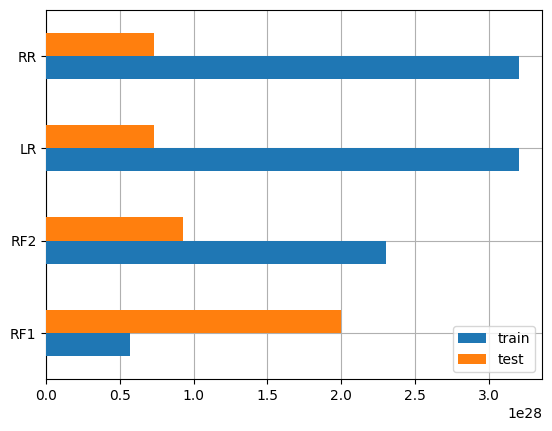

In [186]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Untuk mengujinya, buat prediksi menggunakan beberapa harga dari data test.

In [187]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_LR,prediksi_RR,prediksi_RF1,prediksi_RF2
131,7.142759e+14,7.633840e+15,7.633540e+15,4.995583e+15,5.906515e+15


Terlihat bahwa prediksi dengan Random Forest (RF), baik RF1 ataupun RF2 memberikan hasil yang paling mendekati y_true.